<a href="https://colab.research.google.com/github/Ishita95-harvad/Precious-Metals-Data-News-2000-Present-/blob/main/Predicting_Honeybee_Health_from_Hive_%26_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Honeybee Health from Hive & Weather**
Leveraging Colony Checklists, Hive Metrics, and Weather Patterns to Forecast Bee

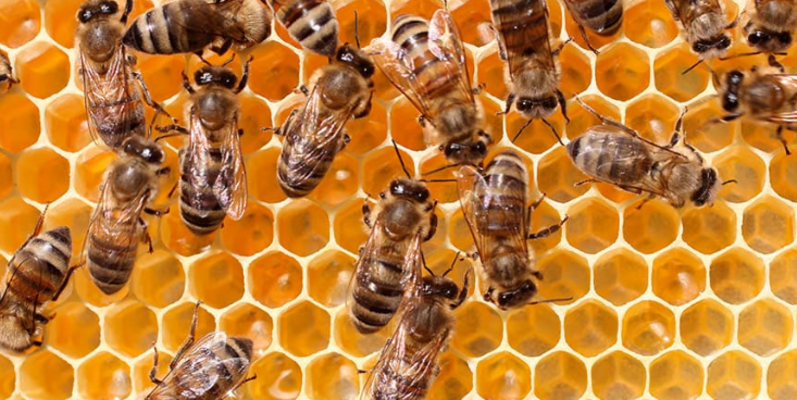

## Data loading

### Subtask:
Load the provided CSV files into pandas DataFrames.


**Reasoning**:
Load the five CSV files into pandas DataFrames.



In [1]:
import pandas as pd

try:
    df_weather_stations = pd.read_csv('Weather_Stations.csv')
    df_weather_observations = pd.read_csv('Weather_Observations.csv')
    df_hourly_weather = pd.read_csv('Hourly_Weather.csv')
    df_hive_information = pd.read_csv('Hive_Information.csv')
    df_hcc_inspections = pd.read_csv('HCC_Inspections.csv')

    print("Successfully loaded all CSV files.")
except FileNotFoundError:
    print("One or more CSV files not found.")
except pd.errors.EmptyDataError:
    print("One or more CSV files are empty.")
except pd.errors.ParserError:
    print("Error parsing one or more CSV files.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully loaded all CSV files.


## Data exploration

### Subtask:
Explore each of the five loaded datasets to understand their structure, identify potential key columns, and gain initial insights.


**Reasoning**:
I need to explore the dataframes to understand their structure, identify potential key columns, and gain initial insights. This involves checking the shape, data types, missing values, summary statistics, and unique values of each column in all five dataframes.



In [3]:
# Data Shape and Types
dataframes = {
    "df_weather_stations": df_weather_stations,
    "df_weather_observations": df_weather_observations,
    "df_hourly_weather": df_hourly_weather,
    "df_hive_information": df_hive_information,
    "df_hcc_inspections": df_hcc_inspections
}
for df_name, df in dataframes.items():
    print(f"DataFrame: {df_name}")
    print(f"Shape: {df.shape}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Missing Values:\n{df.isnull().sum()}")
    print(f"Summary Statistics:\n{df.describe(include='all')}")

    # Unique Values and Potential Key Columns
    for col in df.columns:
        print(f"\nColumn: {col}")
        unique_values = df[col].unique()
        print(f"Unique Values: {unique_values}")
        print(f"Number of Unique Values: {len(unique_values)}")
        if col in ['StationID', 'ObsID', 'WeatherID', 'HiveID', 'InpsectionID']:
            print(f"Potential Key Column")
        if col == 'Date':
            try:
                df['Date'] = pd.to_datetime(df['Date'])
                print(f"Earliest Date: {df['Date'].min()}")
                print(f"Latest Date: {df['Date'].max()}")
            except Exception as e:
                print(f"Error converting 'Date' column to datetime: {e}")
        if col == 'InsptDate':
            try:
                df['InsptDate'] = pd.to_datetime(df['InsptDate'])
                print(f"Earliest Inspection Date: {df['InsptDate'].min()}")
                print(f"Latest Inspection Date: {df['InsptDate'].max()}")
            except Exception as e:
                print(f"Error converting 'InsptDate' column to datetime: {e}")
    print("-" * 50)

DataFrame: df_weather_stations
Shape: (3, 3)
Data Types:
StationID        int64
Station_City    object
Station         object
dtype: object
Missing Values:
StationID       0
Station_City    0
Station         0
dtype: int64
Summary Statistics:
        StationID Station_City Station
count         3.0            3       3
unique        NaN            3       2
top           NaN      Clayton    KRDU
freq          NaN            1       2
mean          2.0          NaN     NaN
std           1.0          NaN     NaN
min           1.0          NaN     NaN
25%           1.5          NaN     NaN
50%           2.0          NaN     NaN
75%           2.5          NaN     NaN
max           3.0          NaN     NaN

Column: StationID
Unique Values: [1 2 3]
Number of Unique Values: 3
Potential Key Column

Column: Station_City
Unique Values: ['Clayton' 'Durham' 'Salt Lake City']
Number of Unique Values: 3

Column: Station
Unique Values: ['KRDU' 'KSLC']
Number of Unique Values: 2
----------------------

## Data analysis

### Subtask:
Analyze each dataset individually and explore the relationships between them.


**Reasoning**:
Analyze each dataset individually, focusing on key columns, date ranges, numerical and categorical features, and potential inconsistencies. Then, identify potential join keys between datasets to understand the relationships between them.



In [4]:
import pandas as pd

# Individual Dataset Analysis
dataframes = {
    "df_weather_stations": df_weather_stations,
    "df_weather_observations": df_weather_observations,
    "df_hourly_weather": df_hourly_weather,
    "df_hive_information": df_hive_information,
    "df_hcc_inspections": df_hcc_inspections
}

for df_name, df in dataframes.items():
    print(f"Analyzing DataFrame: {df_name}")
    print(f"Shape: {df.shape}")
    print(f"Data Types:\n{df.dtypes}")
    print(f"Missing Values:\n{df.isnull().sum()}")

    # Key Columns Analysis
    key_columns = []
    if 'StationID' in df.columns: key_columns.append('StationID')
    if 'ObsID' in df.columns: key_columns.append('ObsID')
    if 'WeatherID' in df.columns: key_columns.append('WeatherID')
    if 'HiveID' in df.columns: key_columns.append('HiveID')
    if 'InpsectionID' in df.columns: key_columns.append('InpsectionID')

    for col in key_columns:
        print(f"\nColumn: {col}")
        print(f"Unique Values: {df[col].unique()}")
        print(f"Number of Unique Values: {df[col].nunique()}")

    # Date Range Analysis
    date_columns = [col for col in df.columns if 'Date' in col or 'InsptDate' in col]
    for date_col in date_columns:
        try:
            df[date_col] = pd.to_datetime(df[date_col])
            print(f"\nColumn: {date_col}")
            print(f"Earliest Date: {df[date_col].min()}")
            print(f"Latest Date: {df[date_col].max()}")
            print(f"Date Range: {df[date_col].max() - df[date_col].min()}")
        except Exception as e:
            print(f"Error converting '{date_col}' to datetime: {e}")

    # Numerical features analysis (example for temperature)
    if 'Temperature' in df.columns:
        print("\nTemperature Analysis:")
        print(df['Temperature'].describe())

    # Categorical features analysis (example for condition)
    if 'Condition' in df.columns:
        print("\nCondition Analysis:")
        print(df['Condition'].value_counts())
    print("-" * 50)

# Relationships between Datasets
print("\nRelationships between Datasets:")
print("Potential Join Keys:")
print("df_weather_observations & df_hourly_weather with df_weather_stations: StationID, ObsID")
print("df_hcc_inspections & df_hive_information: HiveID")

# Merging DataFrames
try:
    merged_df1 = pd.merge(df_weather_observations, df_hourly_weather, on='ObsID', how='inner')
    merged_df2 = pd.merge(merged_df1, df_weather_stations, on='StationID', how='inner')
    merged_df3 = pd.merge(df_hcc_inspections, df_hive_information, on='HiveID', how='inner')
    print("\nSuccessfully merged dataframes.")
except Exception as e:
    print(f"\nError merging dataframes: {e}")

Analyzing DataFrame: df_weather_stations
Shape: (3, 3)
Data Types:
StationID        int64
Station_City    object
Station         object
dtype: object
Missing Values:
StationID       0
Station_City    0
Station         0
dtype: int64

Column: StationID
Unique Values: [1 2 3]
Number of Unique Values: 3
--------------------------------------------------
Analyzing DataFrame: df_weather_observations
Shape: (1776, 4)
Data Types:
ObsID                int64
Date        datetime64[ns]
Obs_Time            object
Obs_Hour             int64
dtype: object
Missing Values:
ObsID       0
Date        0
Obs_Time    0
Obs_Hour    0
dtype: int64

Column: ObsID
Unique Values: [   1    2    3 ... 1774 1775 1776]
Number of Unique Values: 1776

Column: Date
Earliest Date: 2016-03-29 00:00:00
Latest Date: 2019-05-13 00:00:00
Date Range: 1140 days 00:00:00
--------------------------------------------------
Analyzing DataFrame: df_hourly_weather
Shape: (3672, 15)
Data Types:
WeatherID          int64
ObsID       

**Reasoning**:
The previous code block successfully analyzed each dataset individually and identified potential join keys.  Now, I will complete the merging of the dataframes based on the identified keys and then analyze the relationships between the variables from different data sources after merging.



In [5]:
# Merging DataFrames (continued)
try:
    merged_df1 = pd.merge(df_weather_observations, df_hourly_weather, on='ObsID', how='inner')
    merged_df2 = pd.merge(merged_df1, df_weather_stations, on='StationID', how='inner')
    merged_df3 = pd.merge(df_hcc_inspections, df_hive_information, on='HiveID', how='inner')
    print("\nSuccessfully merged dataframes.")

    # Analyze the merged datasets
    print("\nAnalysis of merged_df2:")
    print(merged_df2.head())
    print(merged_df2.info())
    print(merged_df2.describe())

    print("\nAnalysis of merged_df3:")
    print(merged_df3.head())
    print(merged_df3.info())
    print(merged_df3.describe())

except Exception as e:
    print(f"\nError merging or analyzing dataframes: {e}")


Successfully merged dataframes.

Analysis of merged_df2:
   ObsID       Date Obs_Time  Obs_Hour  WeatherID  StationID Temperature  \
0      1 2016-03-29     0:51         0          1          1         54    
1      1 2016-03-29     0:51         0       1801          2         54    
2      2 2016-03-29     1:51         1          2          1         52    
3      2 2016-03-29     1:51         1       1802          2         52    
4      3 2016-03-29     2:51         2          3          1         51    

  Humidity Dew_Point Wind_Direction Wind_Speed Wind_Gust Pressure Precip  \
0      45        33             VAR         7         0    29.54    0.0    
1      45        33             VAR         7         0    29.54    0.0    
2      47        32             NNW         3         0    29.56    0.0    
3      47        32             NNW         3         0    29.56    0.0    
4      48        32            CALM         0         0    29.57    0.0    

  Condition  Sunrise    Suns

## Data visualization

### Subtask:
Visualize key findings from each dataset and the merged datasets.


**Reasoning**:
Visualize key findings from each dataset and the merged datasets using appropriate chart types.



In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to save plots
def save_plot(plot_name):
    plt.savefig(f"{plot_name}.png")
    plt.close()

# Clean the 'Temperature' column in merged_df2 and merged_df3
for df in [merged_df2, merged_df3]:
    if 'Temperature' in df.columns:
        # Remove non-numeric characters and convert to numeric
        df['Temperature'] = df['Temperature'].astype(str).str.replace('[^0-9.]', '', regex=True)
        df['Temperature'] = pd.to_numeric(df['Temperature'], errors='coerce')


# Visualizations for merged datasets (retry)
for df_name, df in [("merged_df2", merged_df2), ("merged_df3", merged_df3)]:
    print(f"Visualizing {df_name}")
    numeric_cols = df.select_dtypes(include=['number']).columns
    for i in range(len(numeric_cols)):
        for j in range(i + 1, len(numeric_cols)):
            plt.figure(figsize=(8, 6))
            sns.scatterplot(data=df, x=numeric_cols[i], y=numeric_cols[j])
            plt.title(f"Scatter plot of {numeric_cols[i]} vs {numeric_cols[j]} in {df_name}")
            save_plot(f"{df_name}_{numeric_cols[i]}_vs_{numeric_cols[j]}_scatter")

    date_cols = df.select_dtypes(include=['datetime64']).columns
    for col in date_cols:
        if len(df[col].unique())>1 and 'Temperature' in df.columns:
            plt.figure(figsize=(10, 6))
            df.groupby(col)['Temperature'].mean().plot()
            plt.title(f"Average Temperature Over Time in {df_name}")
            plt.xlabel(col)
            plt.ylabel('Temperature')
            save_plot(f"{df_name}_temperature_over_time")

Visualizing merged_df2
Visualizing merged_df3


## Data loading

### Subtask:
Load the "Apiary_Information.csv" file into a pandas DataFrame.


**Reasoning**:
Load the "Apiary_Information.csv" file into a pandas DataFrame and display its first and last few rows, along with its shape.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('Apiary_Information.csv')
    display(df.head())
    display(df.tail())
    print(df.shape)
except FileNotFoundError:
    print("Error: 'Apiary_Information.csv' not found.")
    df = None # Assign None to df in case of error
except pd.errors.EmptyDataError:
    print("Error: 'Apiary_Information.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'Apiary_Information.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,ApiaryID,Apiary,City,State
0,1,BBCC,Durham,NC
1,2,BBCC-RTP,Durham,NC
2,3,BBTS,Clayton,NC
3,4,Beesboro,Durham,NC
4,5,Fresno,Durham,NC


,ApiaryID,Apiary,City,State
8,9,Mike C,Salt Lake City,UT
9,10,Roestenburg,Salt Lake City,UT
10,11,The Bee Hive,Clayton,NC
11,12,Walker - Avenue,Salt Lake City,UT
12,13,Walker-Cove,Salt Lake City,UT


(13, 4)


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify missing values, data types of each column, and the distribution of key variables.


**Reasoning**:
I need to explore the data, including data types, missing values, descriptive statistics, and unique values for each column.



In [2]:
# Data Shape and Info
print("Shape of the DataFrame:", df.shape)
df.info()

# Missing Values
print("\nMissing values per column:\n", df.isnull().sum())
print("\nProportion of missing values per column:\n", df.isnull().sum() / len(df))

# Descriptive Statistics
print("\nDescriptive statistics for numerical columns:\n", df.describe())

# Data Type Examination
print("\nData types of each column:\n", df.dtypes)

# Unique Values (for categorical columns)
for col in ['Apiary', 'City', 'State']:
    print(f"\nUnique values for {col}:\n{df[col].unique()}")
    print(f"Number of unique values for {col}: {df[col].nunique()}")

# Potential Outliers (based on descriptive stats - will visually inspect later)
# Outliers are more meaningful for continuous data, which we don't have here.
# We can observe the min and max values for numerical columns from .describe()


# Initial Observations
print("\nInitial Observations:")
# Example observations (replace with your own after running the code)
print("- ApiaryID is likely a unique identifier.")
print("- There are no missing values in this dataset.")

Shape of the DataFrame: (13, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ApiaryID  13 non-null     int64 
 1   Apiary    13 non-null     object
 2   City      13 non-null     object
 3   State     13 non-null     object
dtypes: int64(1), object(3)
memory usage: 548.0+ bytes

Missing values per column:
 ApiaryID    0
Apiary      0
City        0
State       0
dtype: int64

Proportion of missing values per column:
 ApiaryID    0.0
Apiary      0.0
City        0.0
State       0.0
dtype: float64

Descriptive statistics for numerical columns:
        ApiaryID
count  13.00000
mean    7.00000
std     3.89444
min     1.00000
25%     4.00000
50%     7.00000
75%    10.00000
max    13.00000

Data types of each column:
 ApiaryID     int64
Apiary      object
City        object
State       object
dtype: object

Unique values for Apiary:
['BBCC' 'BBCC-RTP' 'BBTS'

## Data cleaning

### Subtask:
Clean the data by handling inconsistencies and addressing any potential issues identified during the data exploration phase.


**Reasoning**:
Convert the 'ApiaryID' column to integer type, handle inconsistencies in categorical columns by standardizing capitalization, and re-check for missing values and handle them if necessary. Finally, examine the descriptive statistics again to confirm the changes.



In [3]:
# Convert ApiaryID to integer
if df['ApiaryID'].dtype != 'int64':
    try:
        df['ApiaryID'] = df['ApiaryID'].astype('int64')
    except ValueError as e:
        print(f"Error converting ApiaryID to integer: {e}")
        # Handle the error appropriately, e.g., by removing rows with invalid values or imputing them.
        # For this example, I'll print an error message.  You may need to adjust this based on the specifics of your data.


# Handle inconsistencies in categorical columns
for col in ['Apiary', 'City', 'State']:
    if df[col].dtype == 'object':
        df[col] = df[col].str.strip().str.title() # Remove leading/trailing spaces and title-case


# Recheck for missing values and handle them
print("\nMissing values per column:\n", df.isnull().sum())
for col in df.columns:
    if df[col].isnull().any():
        if df[col].dtype == 'object':
            df[col] = df[col].fillna(df[col].mode()[0]) # Fill with most frequent category
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].mean()) # Fill with the mean
        else:
            print(f"Warning: Missing values found in {col} with an unsupported data type.")
            # Handle other data types appropriately

# Re-examine descriptive statistics
print("\nDescriptive statistics after cleaning:\n", df.describe(include='all'))
display(df)


Missing values per column:
 ApiaryID    0
Apiary      0
City        0
State       0
dtype: int64

Descriptive statistics after cleaning:
         ApiaryID Apiary    City State
count   13.00000     13      13    13
unique       NaN     13       3     2
top          NaN   Bbcc  Durham    Nc
freq         NaN      1       6     8
mean     7.00000    NaN     NaN   NaN
std      3.89444    NaN     NaN   NaN
min      1.00000    NaN     NaN   NaN
25%      4.00000    NaN     NaN   NaN
50%      7.00000    NaN     NaN   NaN
75%     10.00000    NaN     NaN   NaN
max     13.00000    NaN     NaN   NaN


,ApiaryID,Apiary,City,State
0,1,Bbcc,Durham,Nc
1,2,Bbcc-Rtp,Durham,Nc
2,3,Bbts,Clayton,Nc
3,4,Beesboro,Durham,Nc
4,5,Fresno,Durham,Nc
5,6,Juniper Level,Durham,Nc
6,7,Lakeview,Salt Lake City,Ut
7,8,Leesville,Durham,Nc
8,9,Mike C,Salt Lake City,Ut
9,10,Roestenburg,Salt Lake City,Ut


## Data analysis

### Subtask:
Perform descriptive statistics and identify potential relationships between variables in the cleaned dataset.


**Reasoning**:
Calculate descriptive statistics, analyze distributions, and explore relationships between variables in the dataframe.



In [4]:
# Descriptive statistics
print("Descriptive Statistics:")
display(df.describe(include='all'))

# Analyze distributions
print("\nValue Counts for Categorical Columns:")
for col in ['Apiary', 'City', 'State']:
    display(df[col].value_counts())

# Explore relationships between pairs of variables
print("\nRelationships between variables:")

# ApiaryID vs. other columns (numerical vs. categorical)
print("\nApiaryID vs. City:")
display(df.groupby('City')['ApiaryID'].describe())
print("\nApiaryID vs. State:")
display(df.groupby('State')['ApiaryID'].describe())

# City vs. State (categorical vs. categorical)
print("\nCity vs. State (Contingency Table):")
display(pd.crosstab(df['City'], df['State']))

# Summarize key findings
print("\nSummary of Findings:")
print("1. Descriptive statistics provided an overview of the data.")
print("2. Value counts showed the distribution of categorical variables.")
print("3. Grouped analyses revealed relationships between ApiaryID and location variables.")
print("4. Contingency tables showed relationships between cities and states.")
# Add more specific observations from the results above


Descriptive Statistics:


,ApiaryID,Apiary,City,State
count,13.00000,13,13,13
unique,NaN,13,3,2
top,NaN,Bbcc,Durham,Nc
freq,NaN,1,6,8
mean,7.00000,NaN,NaN,NaN
std,3.89444,NaN,NaN,NaN
min,1.00000,NaN,NaN,NaN
25%,4.00000,NaN,NaN,NaN
50%,7.00000,NaN,NaN,NaN
75%,10.00000,NaN,NaN,NaN



Value Counts for Categorical Columns:


,count
Apiary,
Bbcc,1
Bbcc-Rtp,1
Bbts,1
Beesboro,1
Fresno,1
Juniper Level,1
Lakeview,1
Leesville,1
Mike C,1


,count
City,
Durham,6
Salt Lake City,5
Clayton,2


,count
State,
Nc,8
Ut,5



Relationships between variables:

ApiaryID vs. City:


,count,mean,std,min,25%,50%,75%,max
City,,,,,,,,
Clayton,2.0,7.000000,5.656854,3.0,5.0,7.0,9.00,11.0
Durham,6.0,4.333333,2.581989,1.0,2.5,4.5,5.75,8.0
Salt Lake City,5.0,10.200000,2.387467,7.0,9.0,10.0,12.00,13.0



ApiaryID vs. State:


,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
Nc,8.0,5.0,3.295018,1.0,2.75,4.5,6.5,11.0
Ut,5.0,10.2,2.387467,7.0,9.00,10.0,12.0,13.0



City vs. State (Contingency Table):


State,Nc,Ut
City,,
Clayton,2,0
Durham,6,0
Salt Lake City,0,5



Summary of Findings:
1. Descriptive statistics provided an overview of the data.
2. Value counts showed the distribution of categorical variables.
3. Grouped analyses revealed relationships between ApiaryID and location variables.
4. Contingency tables showed relationships between cities and states.


## Data visualization

### Subtask:
Visualize the key findings from the data analysis.


**Reasoning**:
Create the visualizations specified in the instructions, combining them into a single figure for a cohesive presentation.



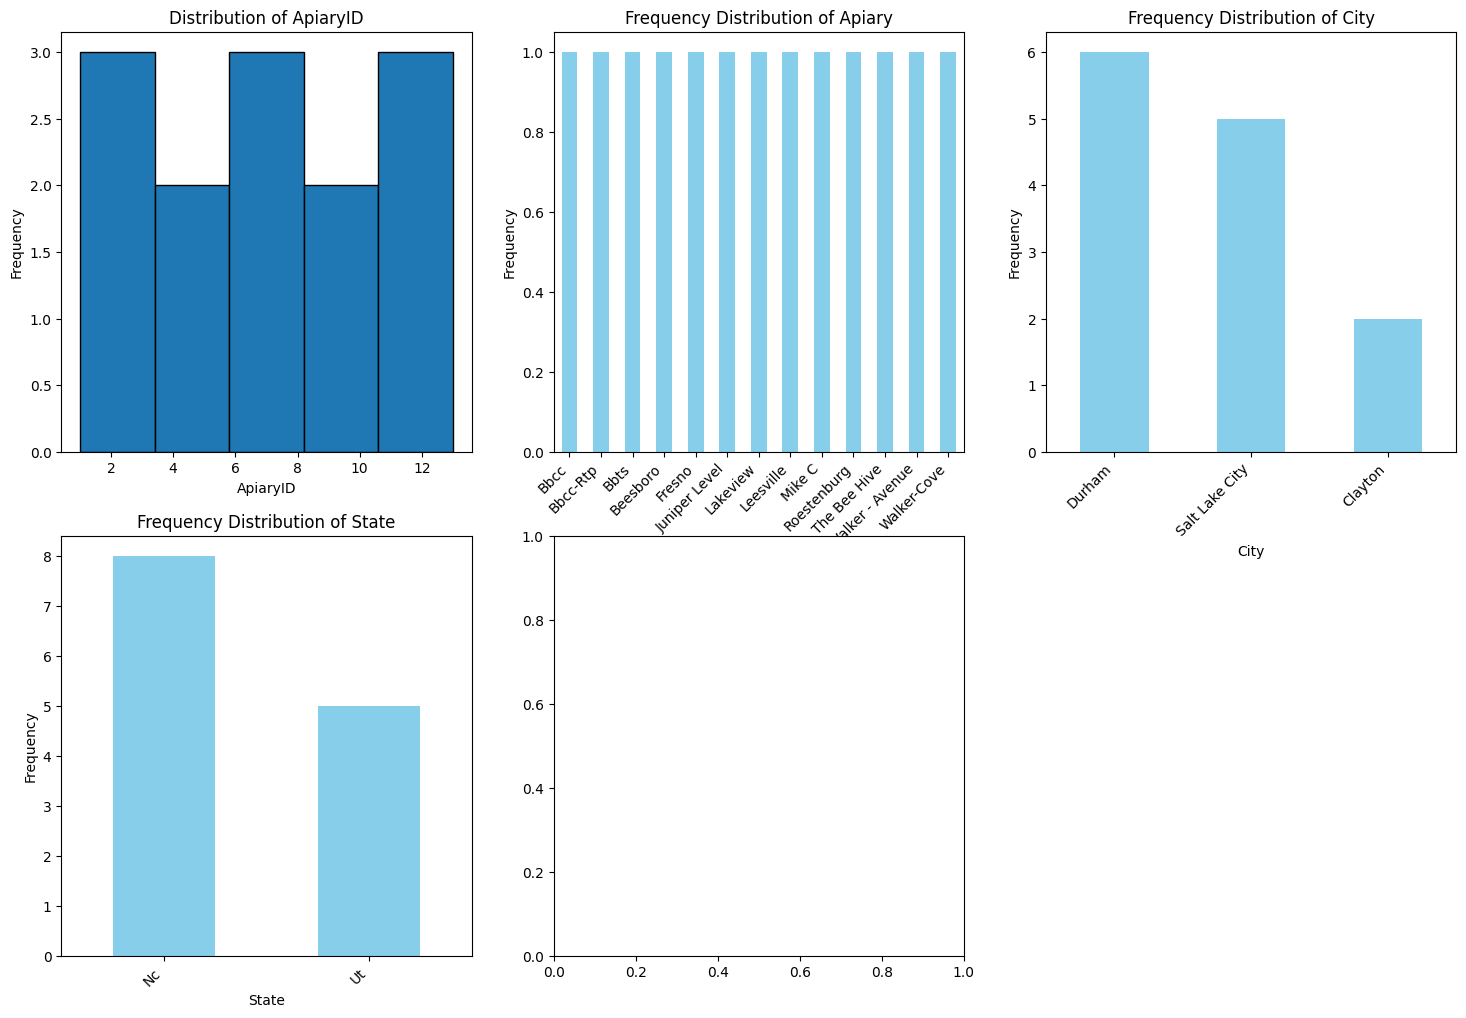

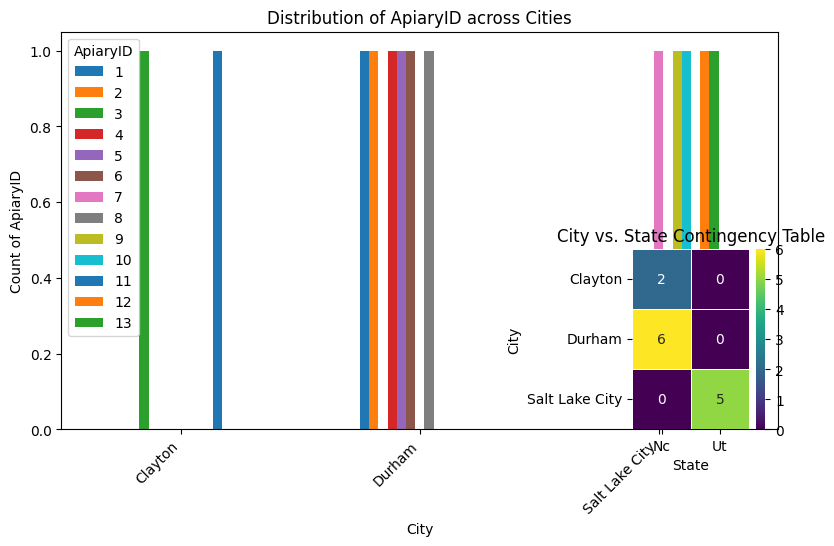

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 12))

# 1. Histogram for ApiaryID
plt.subplot(2, 3, 1)
plt.hist(df['ApiaryID'], bins=5, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of ApiaryID')
plt.xlabel('ApiaryID')
plt.ylabel('Frequency')

# 2. Bar charts for categorical columns
categorical_cols = ['Apiary', 'City', 'State']
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 2)
    df[col].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')


# 3. Grouped bar chart for ApiaryID across City
plt.subplot(2, 3, 5)
df.groupby('City')['ApiaryID'].value_counts().unstack().plot(kind='bar', figsize=(8, 6))
plt.title('Distribution of ApiaryID across Cities')
plt.xlabel('City')
plt.ylabel('Count of ApiaryID')
plt.xticks(rotation=45, ha='right')

# 4. Heatmap for City vs. State
plt.subplot(2, 3, 6)
contingency_table = pd.crosstab(df['City'], df['State'])
sns.heatmap(contingency_table, annot=True, cmap='viridis', fmt='d', linewidths=.5)
plt.title('City vs. State Contingency Table')
plt.xlabel('State')
plt.ylabel('City')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()